In [1]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-u54hj0vw
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-u54hj0vw
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

#Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

from xgboost import XGBRegressor

import joblib

from pycaret.regression import *

import warnings
warnings.filterwarnings('ignore')

#Load and Prepare Data

In [3]:
df = pd.read_csv('./tehranhouses.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [4]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
596,111,2,True,True,True,Saadat Abad,5661000000,188700.00
797,100,2,True,True,True,Pardis,500000000,16666.67
2670,119,2,True,True,True,Shahran,4000000000,133333.33
2480,130,3,False,True,False,Shahrake Qods,600000000,20000.00
1721,150,3,True,True,True,Saadat Abad,14800000000,493333.33


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df = df.drop("Price(USD)" , axis='columns')

In [7]:
setup(df, target="Price" , session_id=85 , remove_outliers = True)

,Description,Value
0,Session id,85
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3479, 7)"
4,Transformed data shape,"(3357, 7)"
5,Transformed train set shape,"(2313, 7)"
6,Transformed test set shape,"(1044, 7)"
7,Numeric features,1
8,Categorical features,2
9,Rows with missing values,0.7%


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1817845651.8962,33520492428413251584.0000,5407713658.5829,0.5387,0.5174,0.4342,0.7250
lightgbm,Light Gradient Boosting Machine,1850921321.3913,33901565924708720640.0000,5473993494.4639,0.5246,0.4909,0.4263,0.3670
gbr,Gradient Boosting Regressor,1869615141.1658,32771862574859378688.0000,5452077188.9199,0.5211,0.5212,0.4816,0.3660
xgboost,Extreme Gradient Boosting,1786040719.9583,33936436112262541312.0000,5497412986.6424,0.5201,0.5249,0.4220,0.4340
rf,Random Forest Regressor,1834918436.3653,35106093936664793088.0000,5550384845.2397,0.5137,0.5014,0.4146,0.9540
knn,K Neighbors Regressor,2037384969.1831,37218050169226051584.0000,5751097217.5036,0.4773,0.5647,0.5148,0.2660
lar,Least Angle Regression,2601293634.3637,36766956164225085440.0000,5814135285.2164,0.4616,0.9709,1.0037,0.3190
llar,Lasso Least Angle Regression,2601293634.5707,36766956168881340416.0000,5814135285.5933,0.4616,0.9709,1.0037,0.3340
lasso,Lasso Regression,2601293634.5707,36766956168881344512.0000,5814135285.5933,0.4616,0.9709,1.0037,0.4330
lr,Linear Regression,2601293596.6446,36766956118745452544.0000,5814135279.4149,0.4616,0.9709,1.0037,0.9400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=85)

In [ ]:
my_model = create_model('xgboost')

# Explore the data (EDA)

In [10]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   object
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(2), object(2)
memory usage: 119.0+ KB


In [12]:
df.describe()

,Room,Price
count,3479.000000,3.479000e+03
mean,2.079908,5.359023e+09
std,0.758275,8.099935e+09
min,0.000000,3.600000e+06
25%,2.000000,1.418250e+09
50%,2.000000,2.900000e+09
75%,2.000000,6.000000e+09
max,5.000000,9.240000e+10


In [13]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   int64 
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(3), object(1)
memory usage: 119.0+ KB


In [15]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000
3475,83,2,True,True,True,Niavaran,6800000000
3476,75,2,False,False,False,Parand,365000000
3477,105,2,True,True,True,Dorous,5600000000


In [16]:
df.shape

(3479, 7)

In [17]:
print(df.dtypes)

Area          int64
Room          int64
Parking        bool
Warehouse      bool
Elevator       bool
Address      object
Price         int64
dtype: object


In [18]:
df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,23
Price,0


In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(3456, 7)

In [21]:
df['Parking'].value_counts(normalize=True)*100

,proportion
Parking,
True,84.751157
False,15.248843


In [22]:
pd.crosstab( df.Parking, df.Room )

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [23]:
below_85 = df[ df.Area <= 85 ]
len(below_85)

1522

In [24]:
df[ df.Area <= 85 ]["Parking"].value_counts( )

,count
Parking,
True,1104
False,418


In [25]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [26]:
len(df.Address.unique())

192

In [27]:
round(df.Price.mean())

5379956887

In [28]:
df.groupby( 'Room' )['Price'].mean()

,Price
Room,
0,7.860500e+09
1,1.707481e+09
2,3.330303e+09
3,1.093869e+10
4,2.560033e+10
5,3.373439e+10


In [29]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [30]:
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [31]:
df2 = df.copy()

In [32]:
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)

In [33]:
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,"1,850,000,000"
1,60,1,True,True,True,Shahran,"1,850,000,000"
2,79,2,True,True,True,Pardis,"550,000,000"
3,95,2,True,True,True,Shahrake Qods,"902,500,000"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000"
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000"
3475,83,2,True,True,True,Niavaran,"6,800,000,000"
3476,75,2,False,False,False,Parand,"365,000,000"
3477,105,2,True,True,True,Dorous,"5,600,000,000"


In [34]:
df.dtypes

,0
Area,int64
Room,int64
Parking,bool
Warehouse,bool
Elevator,bool
Address,object
Price,int64


<Figure size 800x500 with 0 Axes>

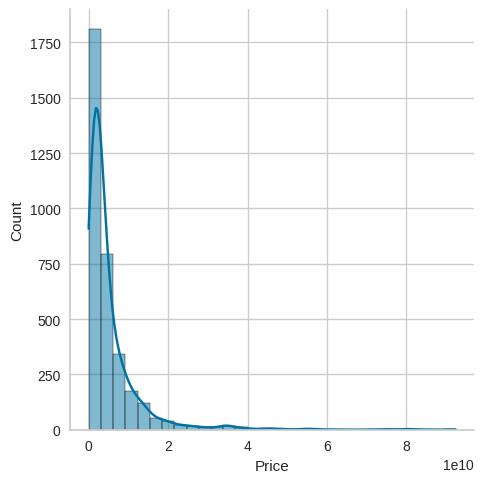

In [35]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )

In [ ]:
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')

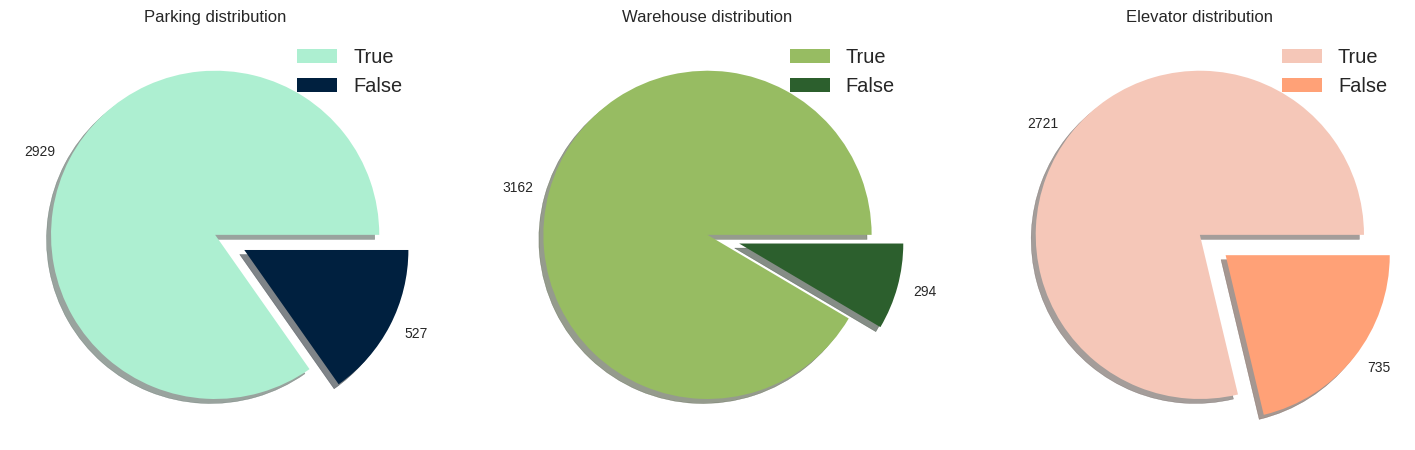

In [36]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

In [37]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]

Text(0.5, 1.0, 'Number of flats in location')

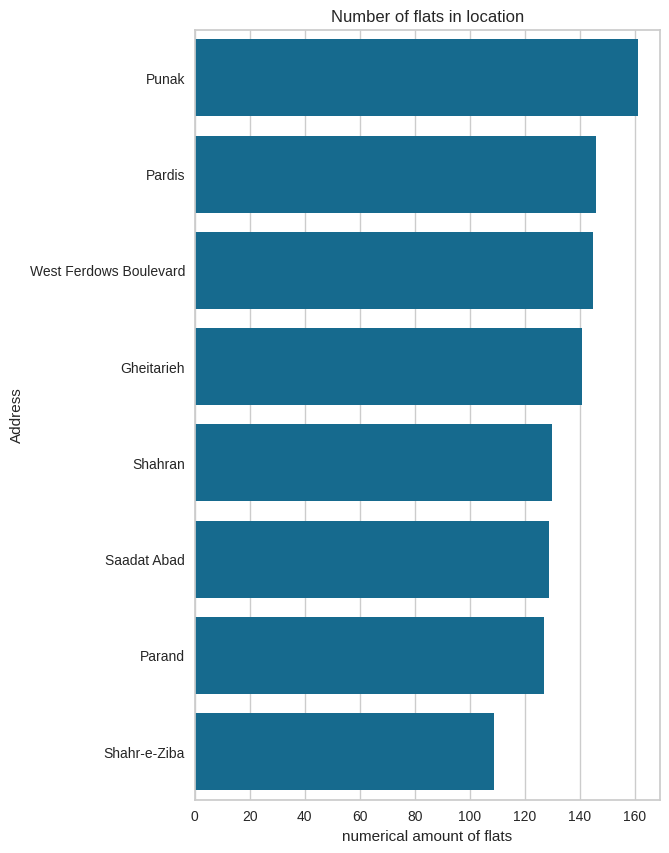

In [38]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')

In [39]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

In [40]:
df.sort_values('Price',ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


# Preprocessing

In [41]:
df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,0
Price,0


In [42]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000
3475,83,2,True,True,True,Niavaran,6800000000
3476,75,2,False,False,False,Parand,365000000
3477,105,2,True,True,True,Dorous,5600000000


# Model Building

In [43]:
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [ ]:
print(f"Skewness of features:\n{df.skew()}")

<Axes: xlabel='Price'>

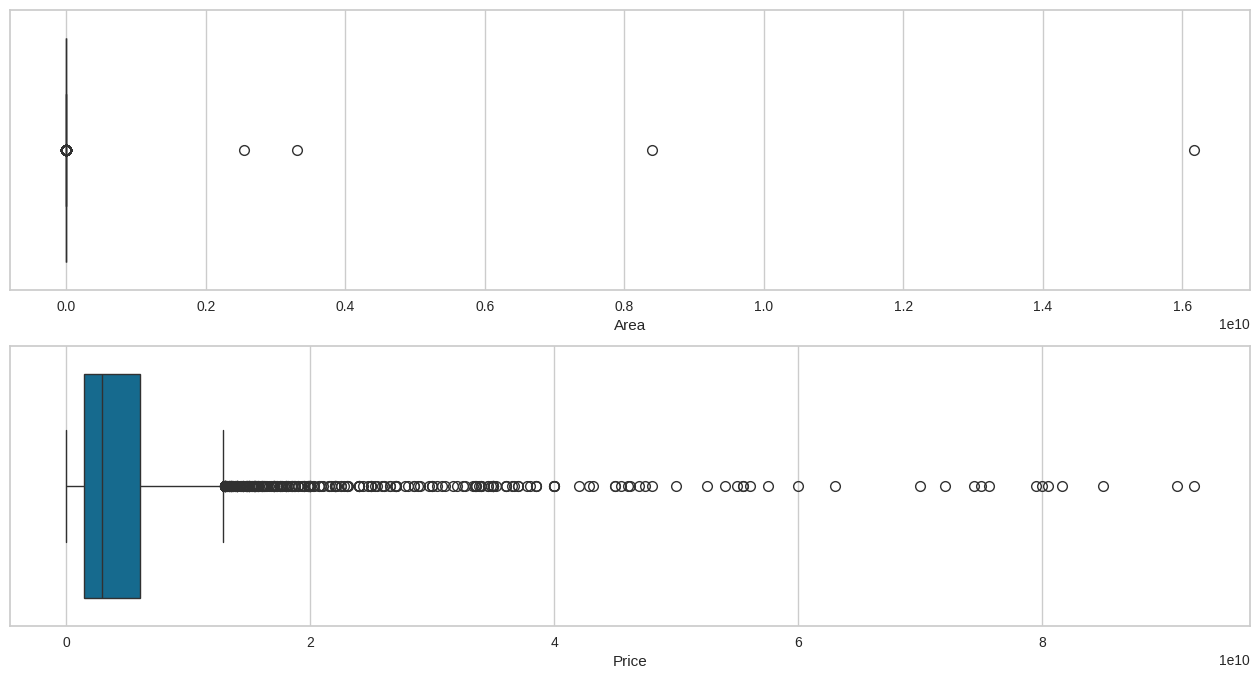

In [44]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

In [45]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [46]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [47]:
total_outliers

array([  25,   58,   83,  101,  145,  159,  160,  166,  173,  176,  187,
        189,  193,  195,  196,  200,  210,  215,  218,  220,  226,  234,
        235,  238,  260,  262,  264,  269,  270,  281,  283,  284,  297,
        299,  315,  327,  329,  338,  339,  340,  342,  343,  344,  345,
        346,  347,  348,  349,  351,  353,  355,  356,  362,  363,  364,
        394,  410,  411,  412,  429,  430,  436,  439,  458,  463,  496,
        512,  514,  515,  516,  525,  534,  547,  553,  559,  564,  565,
        566,  567,  569,  572,  576,  577,  578,  579,  582,  599,  600,
        610,  627,  635,  638,  640,  641,  648,  649,  652,  706,  712,
        721,  729,  730,  731,  738,  739,  740,  753,  765,  792,  803,
        804,  816,  819,  828,  834,  836,  849,  872,  876,  891,  955,
        956,  962, 1005, 1006, 1012, 1021, 1022, 1028, 1031, 1033, 1103,
       1110, 1114, 1128, 1136, 1137, 1148, 1174, 1175, 1228, 1230, 1231,
       1232, 1258, 1260, 1265, 1266, 1270, 1282, 12

In [48]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
df_final.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df_final

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,902500000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,1,1,1,7000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3475,83,2,1,1,1,6800000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,75,2,0,0,0,365000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3477,105,2,1,1,1,5600000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2764, 197)
shape of y train: (2764,)
shape of x test: (692, 197)
shape of y train: (692,)


In [51]:
def parameter_finder (model, parameters):

    start = time.time()

    grid = GridSearchCV(model,
                        param_grid = parameters,
                        refit = True,
                        cv = KFold(shuffle = True, random_state = 1),
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)

    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    model_name = str(model).split('(')[0]

    end = time.time()

    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")


    return train_score, test_score, RMSE

In [52]:
lr = LinearRegression(n_jobs = -1)

lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})

The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 60.40% for LinearRegression model.
(R2 score) in the testing set is 53.35% for LinearRegression model.
RMSE is 6,357,973,671.712957 for LinearRegression model.
--------------------
Runtime of the program is: 0.34


In [53]:
ridge = Ridge(random_state = 1)
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Ridge model.
(R2 score) in the testing set is 53.36% for Ridge model.
RMSE is 6,357,553,945.624987 for Ridge model.
--------------------
Runtime of the program is: 0.55


In [54]:
lasso = Lasso(random_state = 1)
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Lasso model.
(R2 score) in the testing set is 53.35% for Lasso model.
RMSE is 6,357,953,517.829563 for Lasso model.
--------------------
Runtime of the program is: 20.42


In [55]:
eln = ElasticNet(random_state = 1)
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.7}
--------------------
(R2 score) in the training set is 59.51% for ElasticNet model.
(R2 score) in the testing set is 55.36% for ElasticNet model.
RMSE is 6,219,838,182.729824 for ElasticNet model.
--------------------
Runtime of the program is: 40.27


In [56]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
(R2 score) in the training set is 97.91% for DecisionTreeRegressor model.
(R2 score) in the testing set is 71.37% for DecisionTreeRegressor model.
RMSE is 4,980,876,315.211948 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 2.95


In [57]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
(R2 score) in the training set is 94.05% for RandomForestRegressor model.
(R2 score) in the testing set is 77.55% for RandomForestRegressor model.
RMSE is 4,411,228,714.032563 for RandomForestRegressor model.
--------------------
Runtime of the program is: 95.59


In [58]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 60.39% for KNeighborsRegressor model.
(R2 score) in the testing set is 63.99% for KNeighborsRegressor model.
RMSE is 5,586,254,776.237762 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 5.15


In [59]:
et = ExtraTreesRegressor(random_state=1, n_jobs=-1)

param_et = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [None,3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
et_train_score, et_test_score, et_RMSE = parameter_finder(et, param_et)

The best parameters for ExtraTreesRegressor model is: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
--------------------
(R2 score) in the training set is 99.18% for ExtraTreesRegressor model.
(R2 score) in the testing set is 76.95% for ExtraTreesRegressor model.
RMSE is 4,469,544,655.155666 for ExtraTreesRegressor model.
--------------------
Runtime of the program is: 1003.26


##XGBoost

In [60]:
xgboost = XGBRegressor(n_jobs = -1)
param_xgboost = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.3, 0.01],
    'max_depth': [3, 5, 10],
    'subsample': [0.75],
    'colsample_bytree': [0.5, 1],
    'gamma': [0, 0.1],
}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 93.66% for XGBRegressor model.
(R2 score) in the testing set is 79.26% for XGBRegressor model.
RMSE is 4,239,637,439.9997125 for XGBRegressor model.
--------------------
Runtime of the program is: 405.26


In [61]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score,et_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score,et_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE, et_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor','ExtraTreesRegressor'])

models_score

,Training score,Testing score,RMSE
LinearRegression,1,1,6357973672
Ridge,1,1,6357553946
Lasso,1,1,6357953518
ElasticNet,1,1,6219838183
DecisionTreeRegressor,1,1,4980876315
RandomForestRegressor,1,1,4411228714
KNeighborsRegressor,1,1,5586254776
XGBoostRegressor,1,1,4239637440
ExtraTreesRegressor,1,1,4469544655


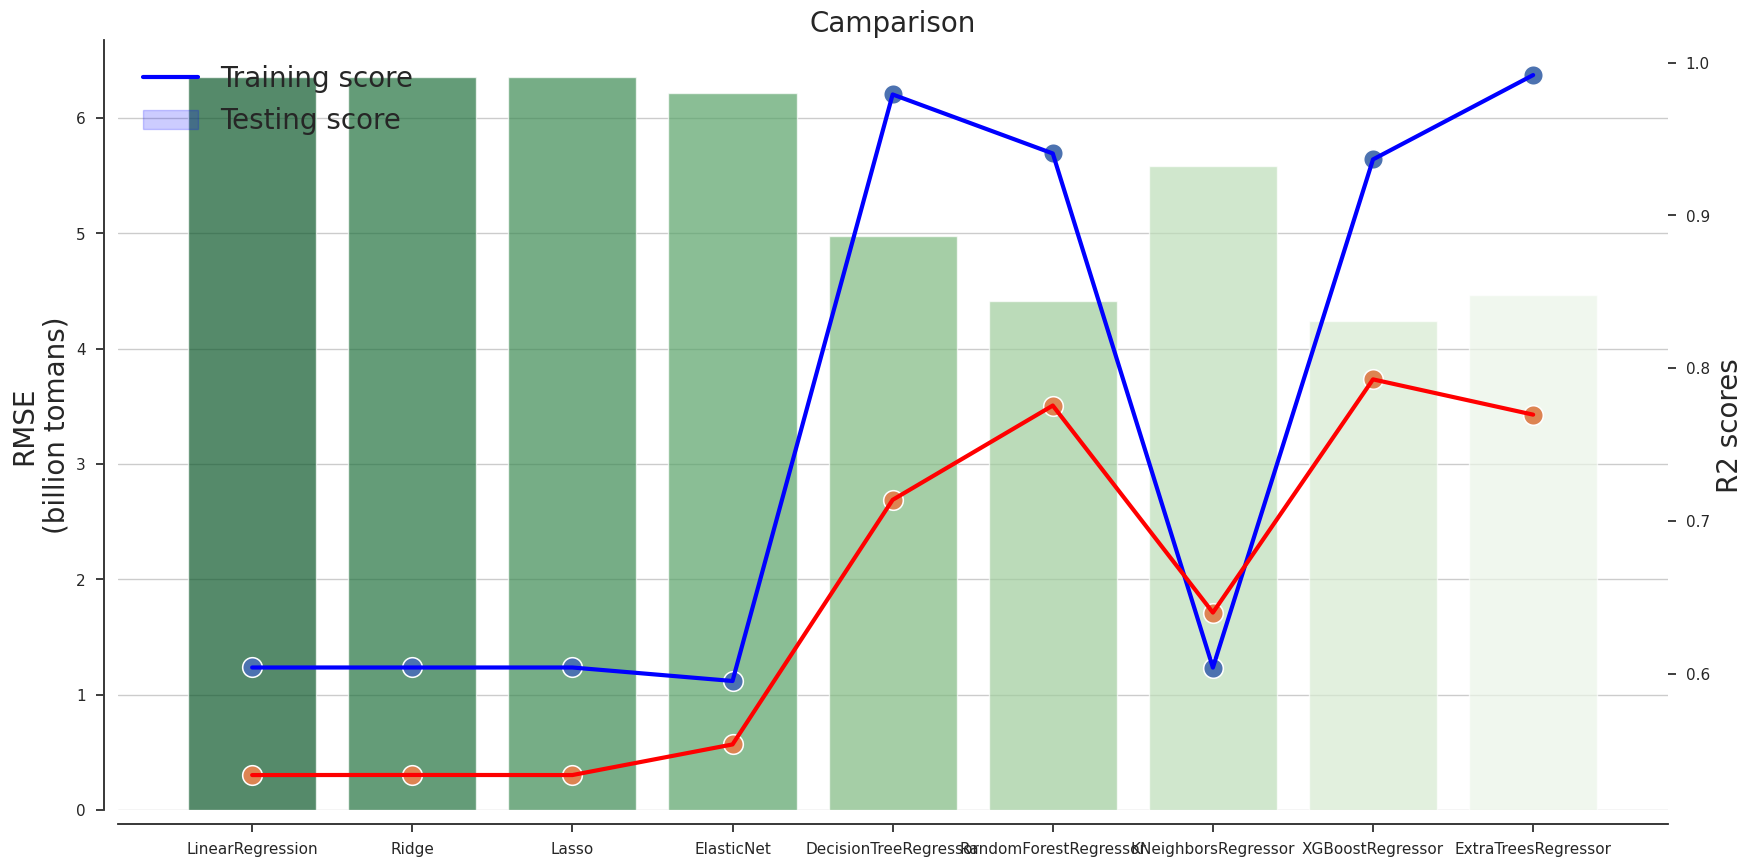

In [62]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')

ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)


sns.despine(offset = 10)

plt.show()

In [63]:
best_params={'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.75}
final_xgb = XGBRegressor(
    n_jobs=-1,
    **best_params
)

In [64]:
final_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, ...)

In [65]:
y_pred = final_xgb.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 4239637439.9997125
R²: 0.7925901407926194


In [66]:
joblib.dump(final_xgb, "final_xgb_model.joblib")

['final_xgb_model.joblib']